<a href="https://colab.research.google.com/github/Bella9ts/Collaborative-DDoS-Attack-Detection-using-FL/blob/main/02_Centralized_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv')

<ipython-input-3-8169a493e68f>:1: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv')


In [ ]:
df.shape

(2219201, 63)

In [ ]:
class_counts = df['Attack_type'].value_counts()

# To get the number of different classes:
num_classes = len(class_counts)

# Print the number of classes and the total count for each class.
print(f"Number of different classes: {num_classes}")
print("\nTotal count for each class:")
print(class_counts)

Number of different classes: 15

Total count for each class:
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


In [ ]:
df.dropna(axis=1,inplace=True)

In [ ]:
df.shape

(2219201, 63)

In [ ]:
# Drop rows with NaN values
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.shape

(2219201, 63)

In [ ]:
classes_to_keep = ['DDoS_UDP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_HTTP', 'Normal']

# Use boolean indexing to filter the DataFrame.
df = df[df['Attack_type'].isin(classes_to_keep)]

In [ ]:
class_counts = df['Attack_type'].value_counts()

# To get the number of different classes:
num_classes = len(class_counts)

# Print the number of classes and the total count for each class.
print(f"Number of different classes: {num_classes}")
print("\nTotal count for each class:")
print(class_counts)

Number of different classes: 5

Total count for each class:
Normal       1615643
DDoS_UDP      121568
DDoS_ICMP     116436
DDoS_TCP       50062
DDoS_HTTP      49911
Name: Attack_type, dtype: int64


In [ ]:
import pandas as pd


# Separate data for each class
normal_data = df[df['Attack_type'] == 'Normal']
ddos_udp_data = df[df['Attack_type'] == 'DDoS_UDP']
ddos_icmp_data = df[df['Attack_type'] == 'DDoS_ICMP']
ddos_tcp_data = df[df['Attack_type'] == 'DDoS_TCP']
ddos_http_data = df[df['Attack_type'] == 'DDoS_HTTP']

# Sample each class to have a maximum count of 200,000
max_count = 200000

normal_sampled = normal_data.sample(min(max_count, len(normal_data)))
ddos_udp_sampled = ddos_udp_data.sample(min(max_count, len(ddos_udp_data)))
ddos_icmp_sampled = ddos_icmp_data.sample(min(max_count, len(ddos_icmp_data)))
ddos_tcp_sampled = ddos_tcp_data.sample(min(max_count, len(ddos_tcp_data)))
ddos_http_sampled = ddos_http_data.sample(min(max_count, len(ddos_http_data)))

# Concatenate the sampled data back together
balanced_df = pd.concat([normal_sampled, ddos_udp_sampled, ddos_icmp_sampled, ddos_tcp_sampled, ddos_http_sampled])

# Shuffle the rows
df = balanced_df.sample(frac=1).reset_index(drop=True)



In [ ]:
class_counts = df['Attack_type'].value_counts()

# To get the number of different classes:
num_classes = len(class_counts)

# Print the number of classes and the total count for each class.
print(f"Number of different classes: {num_classes}")
print("\nTotal count for each class:")
print(class_counts)

Number of different classes: 5

Total count for each class:
Normal       200000
DDoS_UDP     121568
DDoS_ICMP    116436
DDoS_TCP      50062
DDoS_HTTP     49911
Name: Attack_type, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode_object_columns(df):
    # Select columns with object dtype
    object_columns = df.select_dtypes(include='object').columns

    if object_columns.empty:
        print("No object columns to encode.")
        return df

    # Initialize a LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to each object column
    for col in object_columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    print("Label encoding completed for object columns:", object_columns)
    return df


df = label_encode_object_columns(df)

Label encoding completed for object columns: Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'tcp.options', 'tcp.payload', 'tcp.srcport',
       'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname',
       'mqtt.topic', 'Attack_type'],
      dtype='object')


In [ ]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,282370,58095,22978,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
1,149971,58095,4273,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,2
2,418925,58095,0,0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,3
3,242462,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
4,464652,58095,0,0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537972,10467,58096,22979,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,0
537973,7793,58096,22979,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,0
537974,206724,0,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,4
537975,504872,58095,0,0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1,3


# Perform over-sampling of the majority class using RandomUnderSample

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming you have a DataFrame named 'df' and the column with attack types is 'Attack_type'.

# Create a RandomOverSampler instance.
ros = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Separate the features and the target variable.
X = df.drop('Attack_type', axis=1)  # Features
y = df['Attack_type']  # Target variable

# Apply over-sampling to balance the data.
X_resampled, y_resampled = ros.fit_resample(X, y)


In [ ]:
class_counts = y_resampled.value_counts()
class_counts

0    49911
1    49911
2    49911
3    49911
4    49911
Name: Attack_type, dtype: int64

In [ ]:
X = X_resampled
Y = y_resampled
normalized_X=(X-X.mean())/X.std()

In [ ]:
normalized_X

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
0,-1.246069,-0.055195,0.395662,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,0.440322,0.436892,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,0.499999
1,-1.223511,-0.055195,0.395662,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,0.440322,0.436892,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,0.499999
2,-1.361557,-0.055235,0.395751,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,0.440322,0.436892,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,0.499999
3,-1.245383,-0.055195,0.395662,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,0.440322,0.436892,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,0.499999
4,-1.476050,-0.055195,0.395662,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,0.440322,0.436892,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,0.499999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249550,-1.086325,-0.055235,0.395573,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,-2.002913,-2.003262,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,-1.999996
249551,-0.107010,-2.404387,-1.646460,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,-2.002913,-2.003262,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,-1.999996
249552,0.077763,-0.055235,0.395573,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,-2.002913,-2.003262,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,-1.999996
249553,-0.731722,-0.055235,0.395573,-0.139161,-0.02039,-0.021378,-0.496034,-0.419702,-0.444945,NaN,...,-0.140902,-0.099942,-2.002913,-2.003262,-0.102906,-0.099942,-0.003973,-0.003873,-0.003798,-1.999996


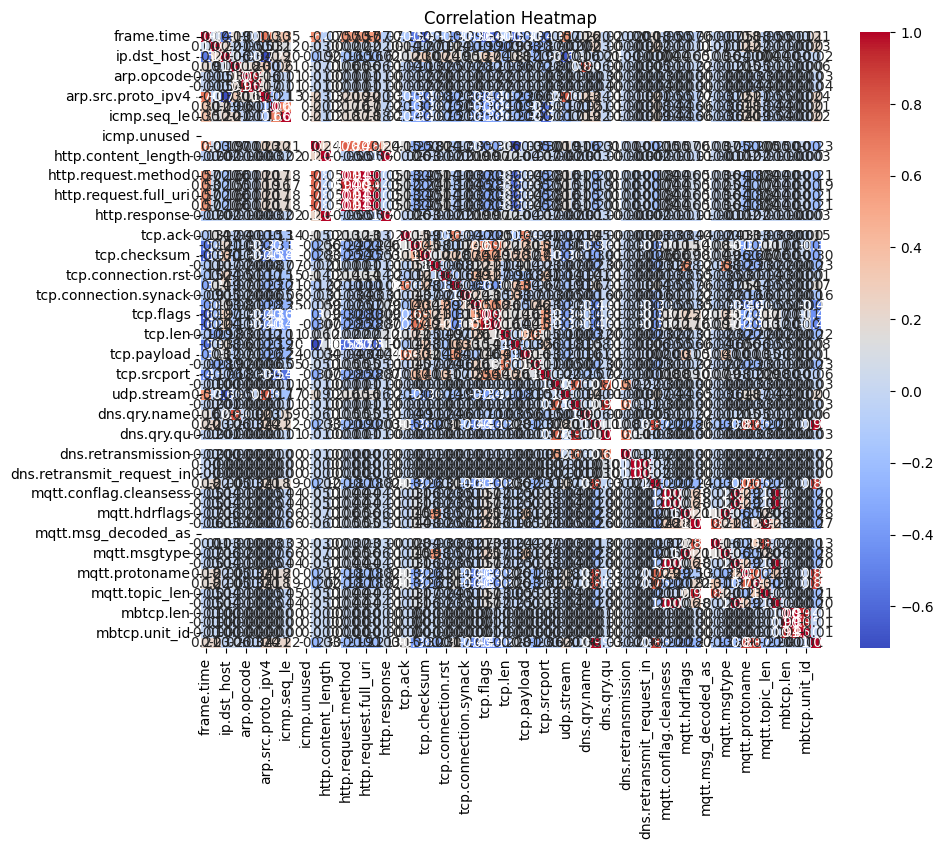

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = normalized_X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Correlated Features to be Dropped:
{'dns.retransmit_request_in', 'mqtt.conflags', 'mbtcp.unit_id', 'arp.hw.size', 'mqtt.msgtype', 'http.request.version', 'mqtt.proto_len', 'mqtt.topic_len', 'http.response', 'mbtcp.trans_id', 'mqtt.ver', 'dns.qry.qu', 'tcp.flags.ack', 'http.referer', 'Attack_label', 'http.request.full_uri'}


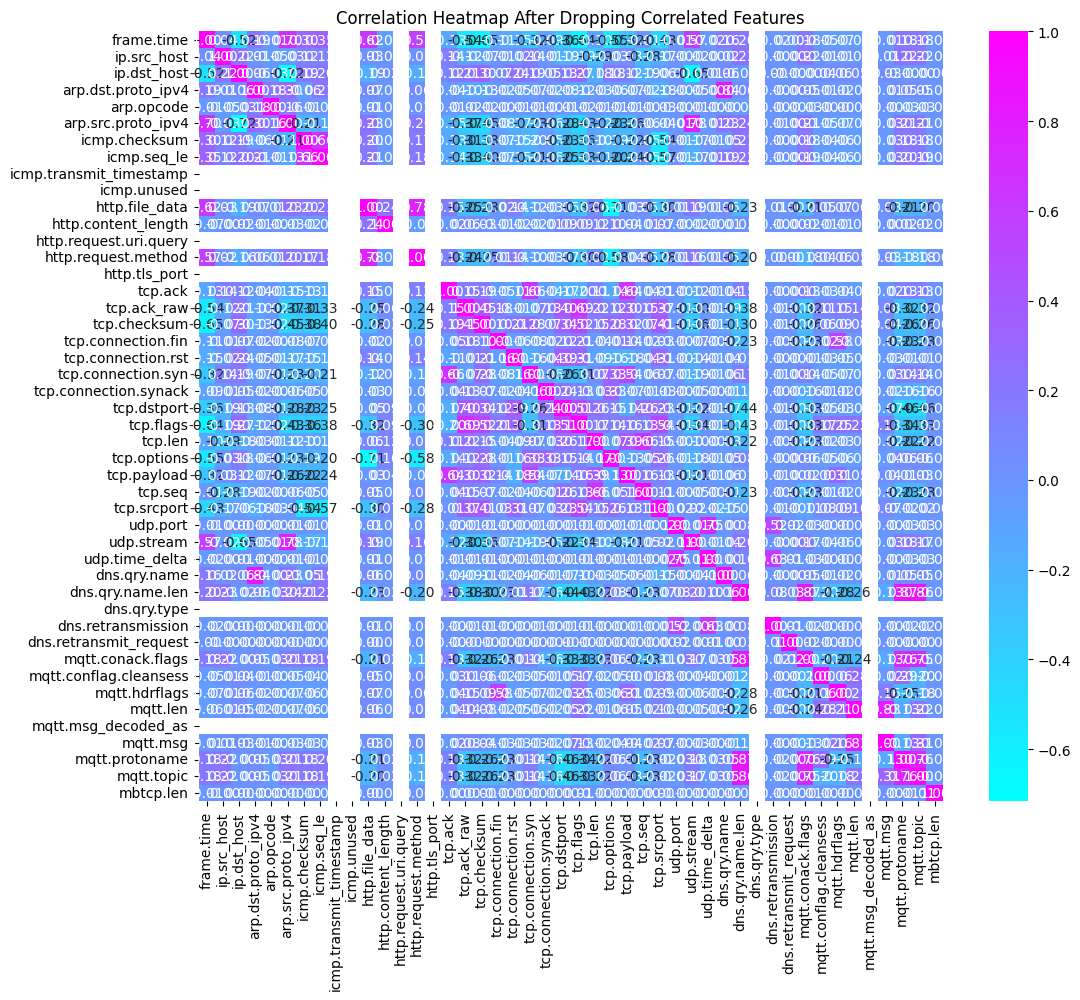

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = normalized_X.corr()

# Set a threshold for correlation.
correlation_threshold = 0.7

# Create a mask to identify highly correlated features
corr_mask = abs(correlation_matrix) > correlation_threshold

# List of features to drop
features_to_drop = set()
for i in range(len(corr_mask.columns)):
    for j in range(i):
        if corr_mask.iloc[i, j]:
            feature_i = corr_mask.columns[i]
            feature_j = corr_mask.columns[j]
            features_to_drop.add(feature_i)

# Drop the correlated features
df_dropped = normalized_X.drop(columns=features_to_drop)

# Print the correlated features to be dropped
print("Correlated Features to be Dropped:")
print(features_to_drop)

# Create a heatmap for the remaining features
plt.figure(figsize=(12, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='cool', fmt=".2f")
plt.title('Correlation Heatmap After Dropping Correlated Features')
plt.show()


In [ ]:
# Drop the column 'column_to_drop'
df_dropped.drop('icmp.transmit_timestamp', axis=1, inplace=True)
df_dropped.drop('icmp.unused', axis=1, inplace=True)
df_dropped.drop('http.request.uri.query', axis=1, inplace=True)
#df_dropped.drop('http.referer', axis=1, inplace=True)
df_dropped.drop('http.tls_port', axis=1, inplace=True)
df_dropped.drop('dns.qry.type', axis=1, inplace=True)
#df_dropped.drop('dns.retransmit_request_in', axis=1, inplace=True)
df_dropped.drop('mqtt.msg_decoded_as', axis=1, inplace=True)
#df_dropped.drop('mbtcp.len', axis=1, inplace=True)
#df_dropped.drop('mbtcp.trans_id', axis=1, inplace=True)
#df_dropped.drop('mbtcp.unit_id', axis=1, inplace=True)

In [ ]:
df_dropped.dtypes

frame.time                float64
ip.src_host               float64
ip.dst_host               float64
arp.dst.proto_ipv4        float64
arp.opcode                float64
arp.src.proto_ipv4        float64
icmp.checksum             float64
icmp.seq_le               float64
http.file_data            float64
http.content_length       float64
http.request.method       float64
tcp.ack                   float64
tcp.ack_raw               float64
tcp.checksum              float64
tcp.connection.fin        float64
tcp.connection.rst        float64
tcp.connection.syn        float64
tcp.connection.synack     float64
tcp.dstport               float64
tcp.flags                 float64
tcp.len                   float64
tcp.options               float64
tcp.payload               float64
tcp.seq                   float64
tcp.srcport               float64
udp.port                  float64
udp.stream                float64
udp.time_delta            float64
dns.qry.name              float64
dns.qry.name.l

# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_dropped, Y, train_size=0.7, random_state=1)

# SVM - Centralized model

Training time: 4.463578939437866 seconds
Evaluation time: 0.4634122848510742 seconds
Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



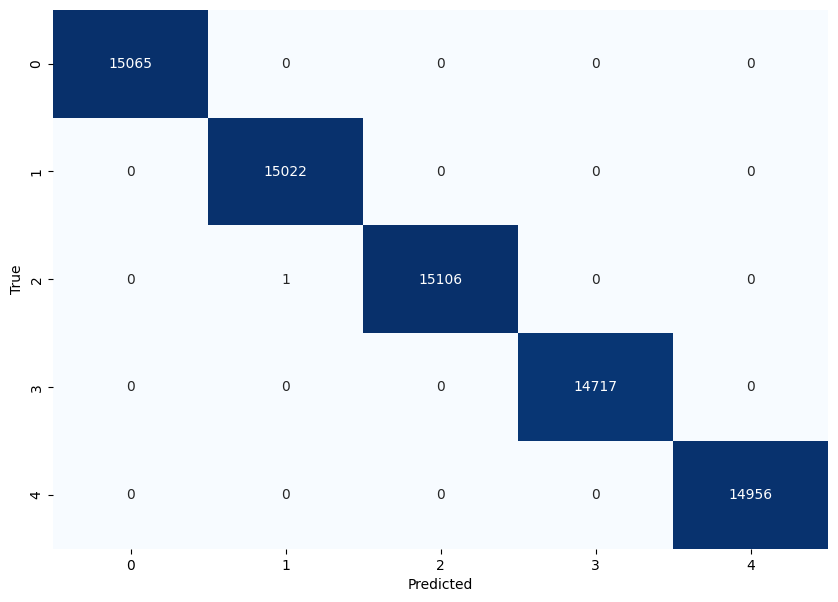

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# Start the timer
start_time = time.time()

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train
svm_classifier.fit(X_train, Y_train)

# Stop the timer
training_time = time.time() - start_time
print(f"Training time: {training_time} seconds")

# Start the timer
start_time = time.time()

# Predict
svm_predictions = svm_classifier.predict(X_test)

# Stop the timer
evaluation_time = time.time() - start_time
print(f"Evaluation time: {evaluation_time} seconds")

# classification report
report = classification_report(Y_test, svm_predictions)

# Print Precision, Recall, and F1-score
print("Classification Report for SVM Model:")
print(report)

cm = confusion_matrix(Y_test, svm_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Decision Tree - Centralized model

Training time: 0.913177490234375 seconds
Evaluation time: 0.013138294219970703 seconds
Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



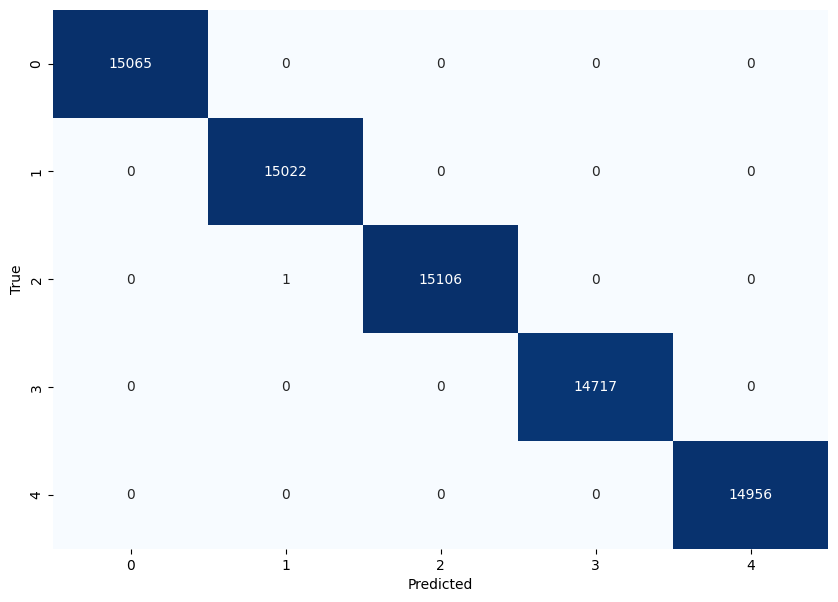

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Start the timer
start_time = time.time()

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train
dt_classifier.fit(X_train, Y_train)

# Stop the timer
training_time = time.time() - start_time
print(f"Training time: {training_time} seconds")

# Start the timer
start_time = time.time()

#predictions
dt_predictions = dt_classifier.predict(X_test)

# Stop the timer
evaluation_time = time.time() - start_time
print(f"Evaluation time: {evaluation_time} seconds")

#classification report
report = classification_report(Y_test, dt_predictions)

# Print Precision, Recall, and F1-score
print("Classification Report for Decision Tree Model:")
print(report)

cm = confusion_matrix(Y_test, dt_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Random Forest - Centralized model

Training time: 11.401864290237427 seconds
Evaluation time: 0.4786362648010254 seconds
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



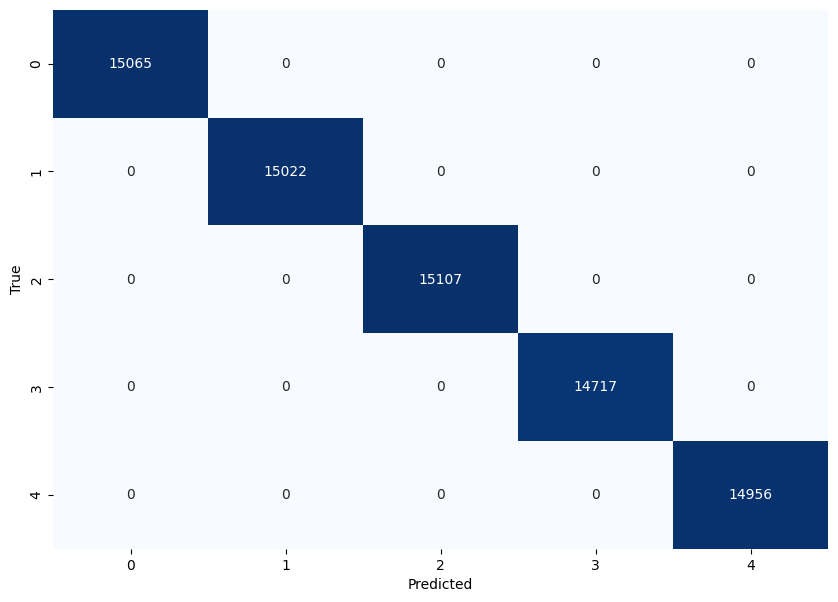

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Start the timer
start_time = time.time()

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train
rf_classifier.fit(X_train, Y_train)

# Stop the timer
training_time = time.time() - start_time
print(f"Training time: {training_time} seconds")

# Start the timer
start_time = time.time()

# predictions
rf_predictions = rf_classifier.predict(X_test)

# Stop the timer
evaluation_time = time.time() - start_time
print(f"Evaluation time: {evaluation_time} seconds")

# classification report
report = classification_report(Y_test, rf_predictions)

# Print Precision, Recall, and F1-score
print("Classification Report for Random Forest Model:")
print(report)

cm = confusion_matrix(Y_test, rf_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# KNN - Centralized model

Training time: 0.05760025978088379 seconds
Evaluation time: 104.31835961341858 seconds
Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15065
           1       1.00      1.00      1.00     15022
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00     14717
           4       1.00      1.00      1.00     14956

    accuracy                           1.00     74867
   macro avg       1.00      1.00      1.00     74867
weighted avg       1.00      1.00      1.00     74867



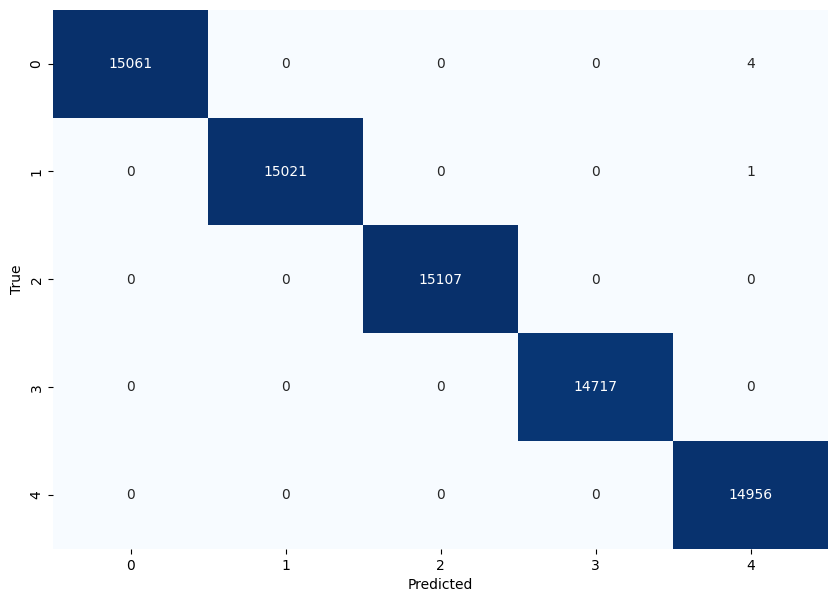

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Start the timer
start_time = time.time()

# Create a K-Nearest Neighbors classifier (KNN)
knn_classifier = KNeighborsClassifier()

# Train
knn_classifier.fit(X_train, Y_train)

# Stop the timer
training_time = time.time() - start_time
print(f"Training time: {training_time} seconds")

# Start the
start_time = time.time()

#predictions
knn_predictions = knn_classifier.predict(X_test)

# Stop the timer
evaluation_time = time.time() - start_time
print(f"Evaluation time: {evaluation_time} seconds")

#classification report
report = classification_report(Y_test, knn_predictions)

# Print Precision, Recall, and F1-score
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(report)

cm = confusion_matrix(Y_test, knn_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# DNN - Centralized model

Epoch 1/10
5459/5459 [==============================] - 23s 3ms/step - loss: 0.0154 - accuracy: 0.9965
Epoch 2/10
5459/5459 [==============================] - 17s 3ms/step - loss: 3.6248e-04 - accuracy: 1.0000
Epoch 3/10
5459/5459 [==============================] - 17s 3ms/step - loss: 2.6292e-04 - accuracy: 1.0000
Epoch 4/10
5459/5459 [==============================] - 17s 3ms/step - loss: 1.0230e-04 - accuracy: 1.0000
Epoch 5/10
5459/5459 [==============================] - 18s 3ms/step - loss: 1.1170e-04 - accuracy: 1.0000
Epoch 6/10
5459/5459 [==============================] - 17s 3ms/step - loss: 1.0345e-04 - accuracy: 1.0000
Epoch 7/10
5459/5459 [==============================] - 17s 3ms/step - loss: 9.4653e-05 - accuracy: 1.0000
Epoch 8/10
5459/5459 [==============================] - 17s 3ms/step - loss: 4.2770e-05 - accuracy: 1.0000
Epoch 9/10
5459/5459 [==============================] - 17s 3ms/step - loss: 4.8121e-05 - accuracy: 1.0000
Epoch 10/10
5459/5459 [==================

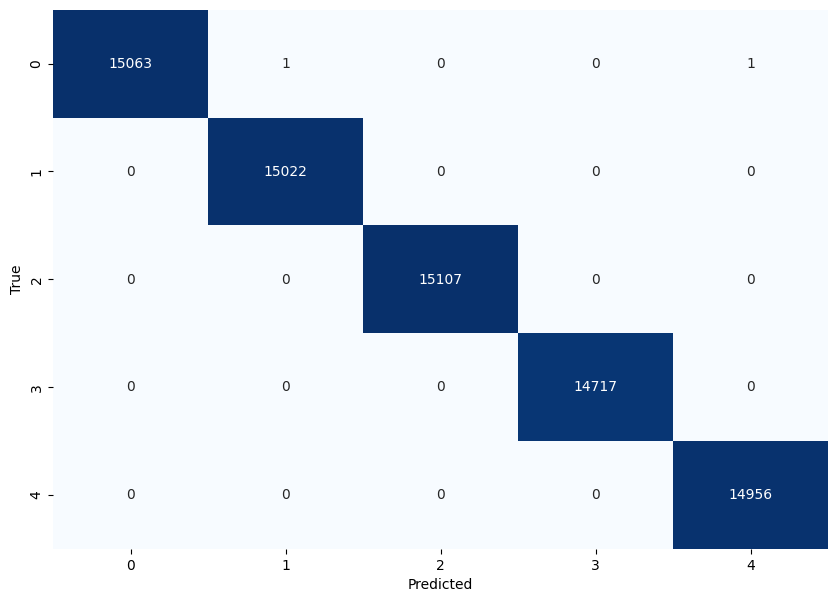

In [ ]:
import time
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Start the timer
start_time = time.time()

# Define the architecture of your DNN using Keras Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train DNN
model.fit(X_train, Y_train, epochs=10, batch_size=32)  # Adjust epochs and batch_size as needed

# Stop the timer
training_time = time.time() - start_time
print(f"Training time: {training_time} seconds")

# Start the timer
start_time = time.time()

#predictions
dnn_predictions = model.predict(X_test)
dnn_predictions = tf.argmax(dnn_predictions, axis=1)

# Stop the timer
evaluation_time = time.time() - start_time
print(f"Evaluation time: {evaluation_time} seconds")

#classification report
report = classification_report(Y_test, dnn_predictions)

# Print Precision, Recall, and F1-score
print("Classification Report for Deep Neural Network (DNN) Model:")
print(report)

cm = confusion_matrix(Y_test, dnn_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

